In [1]:
from KNN import KNN
from utility import *

from sklearn.model_selection import train_test_split
import gc

In [2]:
X=pd.read_csv('dataset/X_dropped.csv')
y=pd.read_csv('dataset/y_dropped.csv')

train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=5000,train_size=30000,random_state=42)

del X,y
gc.collect()

0

K-Nearest-Neighbors

In [3]:
model=KNN()

properties={'k':[2,3,4,5,6,7]}

In [4]:
model_name='KNN'

if 'model' in globals():
    
    best_model,result=model_selector(model,properties,train_X,train_y,n_jobs=-1)
    save(best_model,result,model_name)
    
else:
    from KNN import KNN
    from utility import *

    from sklearn.model_selection import train_test_split
    import gc
    
    X=pd.read_csv('dataset/X_dropped.csv')
    y=pd.read_csv('dataset/y_dropped.csv')

    train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=5000,train_size=30000,random_state=42)

    del X,y
    gc.collect()
    
    best_model,result=load(model_name)

Best Score:  0.9671333333333333
Best Params:  {'k': 4}


In [5]:
result[["param_k","mean_test_score"]]

,param_k,mean_test_score
0,2,0.965367
1,3,0.965667
2,4,0.967133
3,5,0.965533
4,6,0.965733
5,7,0.963433


In [6]:
best_model.fit(train_X,train_y)

KNN(k=4)

In [7]:
pred_y=best_model.predict(test_X)

In [8]:
accuracy_score(test_y,pred_y)

0.9638

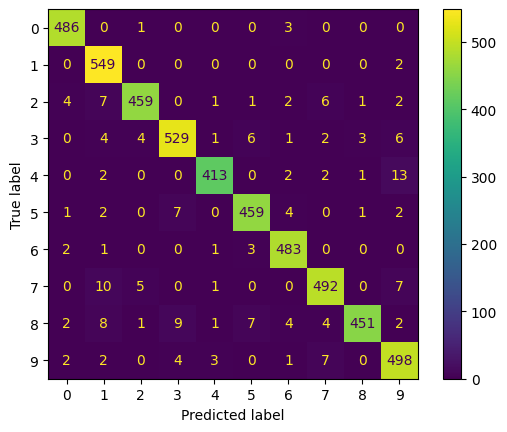

In [9]:
plot_confusion_matrix(test_y,pred_y)